# Proyecto: Análisis de mercado inmobiliario

¡Bienvenido/a al primer proyecto de la carrera de Data Science de Acamica! 

El objetivo de este proyecto es reproducir los pasos que haría un/a Data Scientist cuando se enfrenta a una problemática real. Por eso, consta de tres secciones:
* En la Parte 1, te presentamos la problemática sobre la cual vas a trabajar. En esta sección deberás decidir qué datos te ayudarán a trabajar en este problema y dónde puedes conseguirlos.
* En la Parte 2 te proveemos de un dataset para abordar la problemática planteada. Deberás realizar un Análisis Exploratorio de Datos sobre este dataset.
* En la Parte 3, deberás utilizar herramientas de Machine Learning para predecir la variable de interés.


En este proyecto vas a trabajar con un dataset de propiedades en venta publicado en el portal [Properati](www.properati.com.ar).

## Problema

Recientemente te has incorporado al equipo de Datos de una gran inmobiliaria. La primera tarea que se te asigna es ayudar a los tasadores/as a valuar las propiedades, ya que es un proceso difícil y, a veces, subjetivo. Para ello, propones crear un modelo de Machine Learning que, dadas ciertas características de la propiedad, prediga su precio de venta.

### 1. Pensando como un/a Data Scientist

Responde la siguientes pregunta:
1. ¿Qué datos crees que te ayudarían a trabajar en el problema?¿Por qué?

**Importante**: NO deberás buscar esos datos, solamente justificar qué información crees que te ayudaría a resolver la problemática planteada.

1. Creo que los datos que me ayudarian a trabajar el problema son:

**Tipo de propiedad:** en esta categoria podria haber A)Rural o B)Urbano
A)1) Ganadero
A)2) Agricola
A)3) Mixto

B)1) Comercial: Propiedad horizontal o propiedad vertical
B)2) Residencial: Propiedad horizontal o propiedad vertical

**Superficie:** Los metros cuadrados o hectareas que tiene cada propiedad ya sean cubiertos o descubiertos.

**Ubicacion:** el lugar donde esta asentado es muy importante al decidir la compra de un inmueble

**Cantidad de ambientes:** estaria muy relacionado con la superficie del inmueble.

**Antiguedad:** determina en algunos casos el deterioro de las construcciones.

**Costo de construccion:** este costo serian las erogaciones que se tuviesen que hacer para realizar la misma propiedad nueva y relacionara con la antiguedad para calcular la depreciacion del inmueble, obteniendo asi el valor residual.



### 2. Análisis Exploratorio de Datos

En esta sección, debes realizar un Análisis Exploratorio de Datos sobre el dataset de propiedades de Properati. Es importante que respondas las siguientes preguntas durante el análisis:

* ¿Qué tamaño tiene el dataset?¿Cuántas instancias y cuántas columnas?
* ¿Cuántos valores faltantes hay en cada columna?
* ¿Cómo es la distribución de cada variable? Deberás hacer histogramas para las variables numéricas y gráficos de barras para las variables categóricas.
* ¿Cómo se relacionan las variables entre sí?¿Qué tipo de gráfico será conveniente para presentar esta información?
* ¿Cómo están correlacionadas las variables numéricas?¿Qué tipo de gráfico será conveniente para presentar esta información?¿Cuáles serán los mejores predictores de la variable de interés?

Vas a encontrar instrucciones para responder estas preguntas. Es importante aclarar que estas instrucciones corresponden al **mínimo entregable** que esperamos en la consigna.

**Comentarios sobre el dataset** 
1. Nosotros ya hicimos un *curado* sobre el dataset que puedes descargar directamente de la página de Properati. Muchos de los pasos que hicimos para curar el conjunto de datos los veremos durante el Bloque 2 de la carrera.

2. Si tienes dudas sobre qué representa alguna de las columnas, puedes consultar [aquí](https://www.properati.com.ar/data/). Notarás que algunas columnas fueron descartadas.

3. `Capital Federal` refiere a la Ciudad de Buenos Aires. `Bs.As. G.B.A. Zona Norte`, `Bs.As. G.B.A. Zona Sur` y `Bs.As. G.B.A. Zona Oeste` son regiones que conforman el [Gran Buenos Aires](https://es.wikipedia.org/wiki/Gran_Buenos_Aires), un conjunto de ciudades que rodean a la Ciudad de Buenos Aires.

0. Importa las librerías necesarias para trabajar en la consigna.

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

1. Carga el dataset usando las funcionalidades de Pandas. Imprimir cuántas filas y columnas tiene, y sus cinco primeras instancias.

In [2]:
data = pd.read_csv('DS_Proyecto_01_Datos_Properati.csv')

print('El tamaño del dataset es de:', data.shape)
print('Donde ', data.shape[0], ' son el numero de filas')
print('y ', data.shape[1], ' el numero de columnas')

El tamaño del dataset es de: (146660, 19)
Donde  146660  son el numero de filas
y  19  el numero de columnas


In [3]:
data.head()

,start_date,end_date,created_on,lat,lon,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,title,description,property_type,operation_type
0,2019-10-17,2019-12-23,2019-10-17,-34.605880,-58.384949,Argentina,Capital Federal,San Cristobal,7.0,7.0,2.0,140.0,140.0,153000.0,USD,"***Venta semipiso centro, ideal hostel*****",DESCRIPCION DE LA PROPIEDAD: Departamento de 1...,Departamento,Venta
1,2019-10-17,2019-11-21,2019-10-17,-34.624056,-58.412110,Argentina,Capital Federal,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,USD,Espectacular PH reciclado en Boedo sin expensas.,PH reciclado en Boedo a una cuadra de la plaz...,PH,Venta
2,2019-10-17,2019-11-01,2019-10-17,-34.593569,-58.427474,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,USD,Depto.tipo casa de 2 ambientes en Venta en Pal...,"2 ambienets amplio , excelente estado , patio ...",PH,Venta
3,2019-10-17,2019-12-23,2019-10-17,-34.581294,-58.436754,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0,USD,COSTA RICA 5800 / PALERMO HOLLYWOOD / VENTA PH...,HERMOSO PH EN PALERMO!!!2 AMBIENTES TOTALMENTE...,PH,Venta
4,2019-10-17,2020-03-11,2019-10-17,-34.914194,-57.938219,Argentina,Bs.As. G.B.A. Zona Sur,La Plata,2.0,1.0,1.0,50.0,35.0,40000.0,USD,58 entre 1 y 2 Venta de departamento en ph.1 ...,58 entre 1 y 2 Venta de departamento en PH. P...,PH,Venta


2. **Valores Faltantes**: imprime en pantalla los nombres de las columnas y cuántos valores faltantes hay por columna.

In [4]:
print('Los nombres de las columnas son los siguientes: ', list(data.columns))

Los nombres de las columnas son los siguientes:  ['start_date', 'end_date', 'created_on', 'lat', 'lon', 'l1', 'l2', 'l3', 'rooms', 'bedrooms', 'bathrooms', 'surface_total', 'surface_covered', 'price', 'currency', 'title', 'description', 'property_type', 'operation_type']


In [5]:
print(data.isna().sum())

start_date             0
end_date               0
created_on             0
lat                 9925
lon                 9959
l1                     0
l2                     0
l3                     0
rooms                  0
bedrooms               0
bathrooms           5957
surface_total      20527
surface_covered    21614
price                  0
currency               0
title                  0
description            0
property_type          0
operation_type         0
dtype: int64


3. **Tipos de propiedad**: ¿Cuántos tipos de propiedad hay publicados según este dataset?¿Cuántos instancias por cada tipo de propiedad hay en el dataset? Responde esta pregunta usando las funcionalidad de Pandas y con un gráfico apropiado de Seaborn. **Pistas**: Te puede ser útil googlear cómo rotar las etiquetas del eje x.

In [6]:
print('En el dataset hay un total de', data['property_type'].nunique(), 'tipos de propiedades.')

En el dataset hay un total de 10 tipos de propiedades.


In [7]:
print('La cantidad de instancias por tipo de propiedad son:')
data['property_type'].value_counts()

La cantidad de instancias por tipo de propiedad son:


Departamento       107326
Casa                21521
PH                  14298
Lote                 1312
Oficina               658
Otro                  374
Local comercial       325
Casa de campo         322
Depósito              265
Cochera               259
Name: property_type, dtype: int64

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

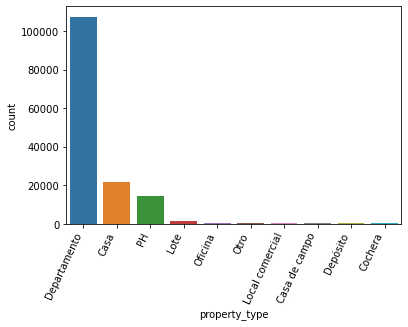

In [8]:
sns.countplot(x = 'property_type',
              data = data,
              order = data['property_type'].value_counts().index)
plt.xticks(rotation=65, horizontalalignment='right')

4. ¿De qué regiones son las publicaciones? Haz gráficos de barras para las variables `l2` y `l3`. Si te animas, puedes hacer los dos gráficos usando `subplot` de Matplotlib. Dale un tamaño apropiado a la figura para que ambos gráficos se visualicen correctamente.

In [9]:
data['l2'].value_counts()

Capital Federal             92539
Bs.As. G.B.A. Zona Norte    24282
Bs.As. G.B.A. Zona Sur      17173
Bs.As. G.B.A. Zona Oeste    12666
Name: l2, dtype: int64

(array([0, 1, 2, 3]), <a list of 4 Text major ticklabel objects>)

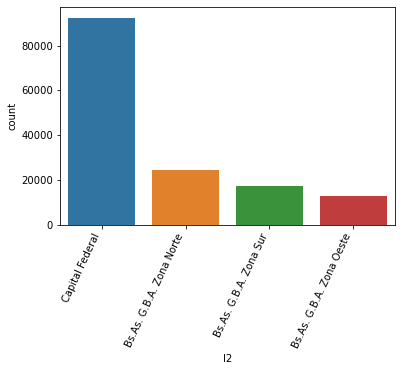

In [10]:
sns.countplot(x = 'l2',
              data = data,
              order = data['l2'].value_counts().index)
plt.xticks(rotation=65, horizontalalignment='right')

In [11]:
data['l3'].value_counts()

Palermo            13073
Tigre               8718
Almagro             7527
Belgrano            6935
Caballito           6650
                   ...  
Cañuelas             108
Villa Soldati         69
Villa Riachuelo       42
Marcos Paz            35
Catalinas              5
Name: l3, Length: 89, dtype: int64

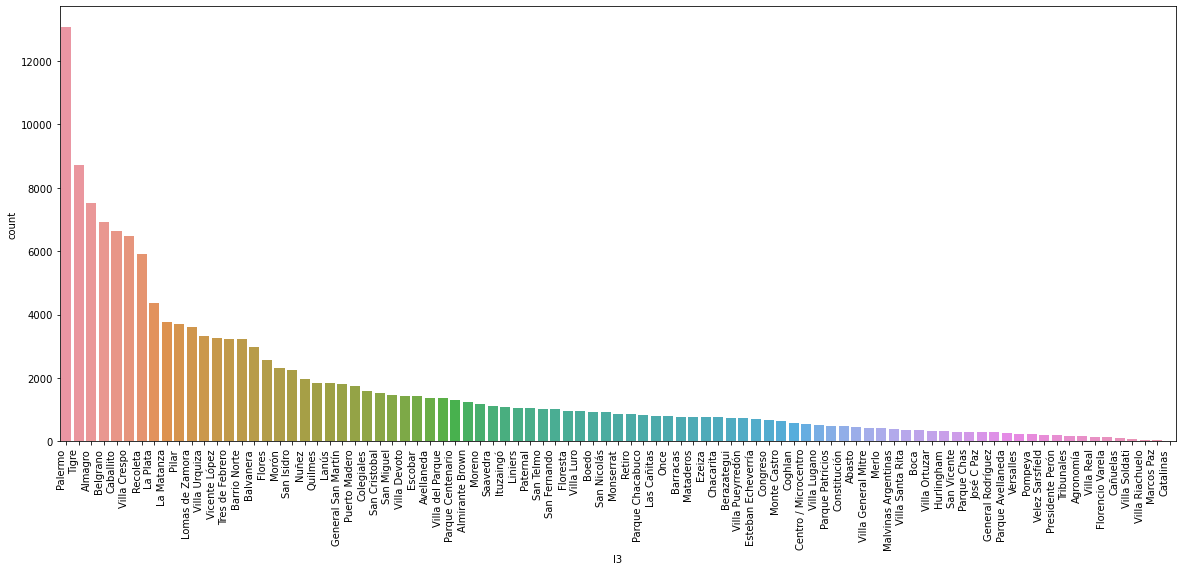

In [12]:
plt.figure(figsize=(20,8))
sns.countplot(x = 'l3',
              data = data,
              order = data['l3'].value_counts().index)
plt.xticks(rotation=90, horizontalalignment='right')
plt.show()

5. **Filtrando el Dataset:** A partir de los resultados del punto 3. y 4., selecciona las tres clases más abundantes de tipos de propiedad y la región con más propiedades publicadas. Crea un nuevo Data Frame con aquellas instancias que cumplen con esas condiciones e imprime su `shape`.

In [13]:
df_select = data.loc[((data['property_type'] == 'Departamento') |
                   (data['property_type'] == 'Casa') |
                   (data['property_type'] == 'PH')) &
                   (data['l2'] == 'Capital Federal')]
df_select.shape

(91485, 19)

**Checkpoint:** deberías tener un dataset con 91485 instacias, 19 columnas.

6. **Distribuciones y relaciones de a pares:** Estudia la distribución y las relaciones de a pares de las variables `rooms`, `bedrooms`, `bathrooms`, `surface_total`, `surface_covered`, `price` para cada tipo de propiedad. Para ello, ten en cuenta:
    1. Obtiene estadísticos que te sirvan para tener una primera idea de los valores que abarcan estas variables. ¿Cuáles crees que toman valores que tal vez no tengan mucho sentido?
    1. Algunas instancias tienen valores de superficie (`surface_total`) muy grandes y dificultan la correcta visualización. Estudia la distribución de esa variable y filtra por un valor razonable que te permita obtener gráficos comprensibles. Puede ser útil un boxplot para determinar un rango razonable.
    1. Lo mismo ocurre con valores de superficie total muy chico.
    1. Las propiedades no pueden tener `surface_covered` mayor a `surface_total`. Si eso sucede, debes filtrar esas instancias.
    1. El rango de precios que toman las propiedades es muy amplio. Estudia la distribución de esa variable y filtra por un valor razonable que te permita obtener gráficos comprensibles. Puede ser útil un boxplot para determinar un rango razonable.
    1. Una vez filtrado el dataset, puedes utilizar la función `pairplot` de Seaborn.

### VARIABLE ROOMS

Estadisticos de vaiable rooms: 
 count    91485.000000
mean         2.964278
std          1.314704
min          1.000000
25%          2.000000
50%          3.000000
75%          4.000000
max         26.000000
Name: rooms, dtype: float64 



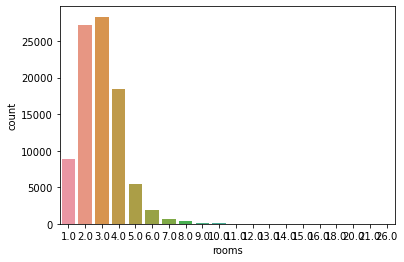

In [14]:
print('Estadisticos de vaiable rooms:','\n', df_select['rooms'].describe(),'\n')
sns.countplot(df_select['rooms'])

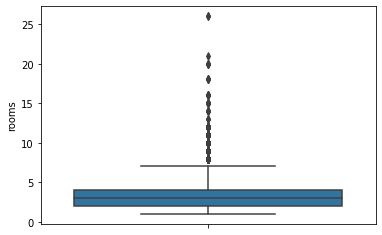

In [15]:
sns.boxplot(data = df_select, y = "rooms")

### VARIABLE BEDROOMS

Estadisticos de vaiable bedrooms: 
 count    91485.000000
mean         1.960278
std          1.072946
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         15.000000
Name: bedrooms, dtype: float64 



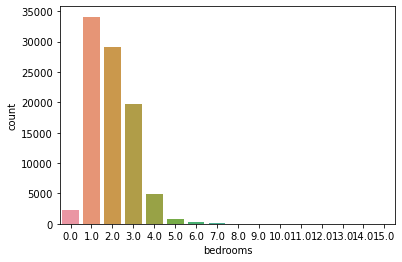

In [16]:
print('Estadisticos de vaiable bedrooms:','\n', df_select['bedrooms'].describe(),'\n')
sns.countplot(df_select['bedrooms'])

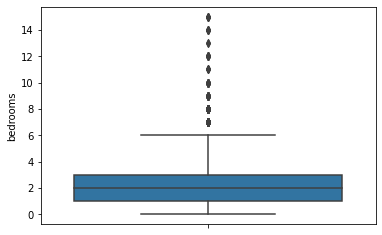

In [17]:
sns.boxplot(data = df_select, y = "bedrooms")

### VARAIBLE BATHROOMS

Estadisticos de vaiable bathrooms: 
 count    89314.000000
mean         1.560147
std          0.860309
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max         14.000000
Name: bathrooms, dtype: float64 



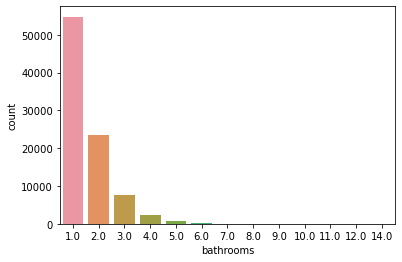

In [18]:
print('Estadisticos de vaiable bathrooms:','\n', df_select['bathrooms'].describe(),'\n')
sns.countplot(df_select['bathrooms'])

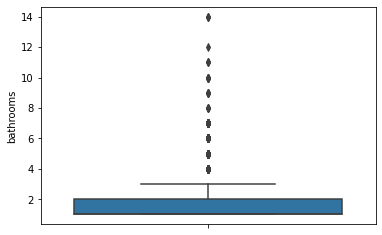

In [19]:
sns.boxplot(data = df_select, y = "bathrooms")

### VARIABLE SURFACE TOTAL

Estadisticos de vaiable surface_total: 
 count     82568.000000
mean        112.626369
std         980.713664
min          10.000000
25%          49.000000
50%          71.000000
75%         111.000000
max      126062.000000
Name: surface_total, dtype: float64 



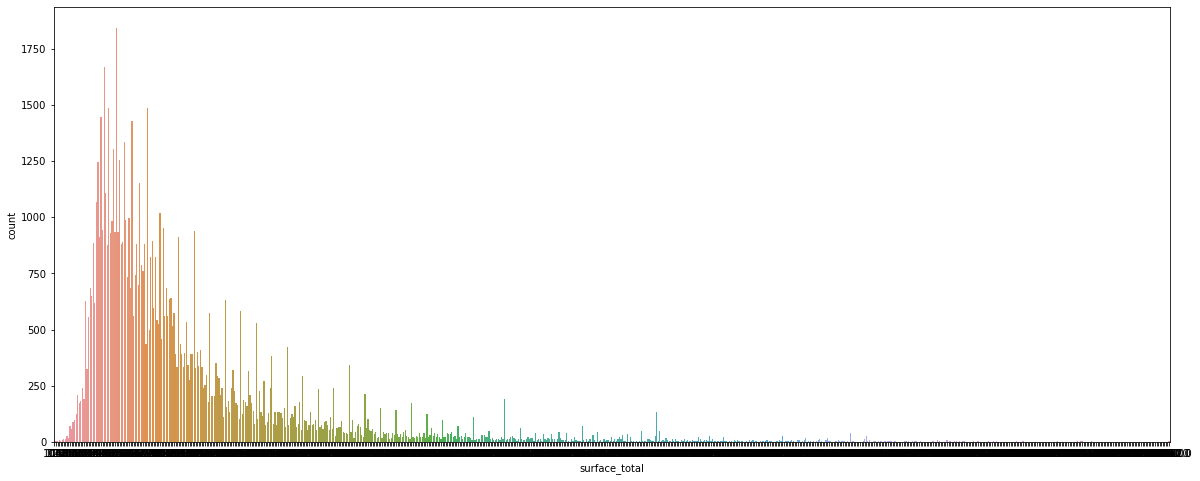

In [20]:
print('Estadisticos de vaiable surface_total:','\n', df_select['surface_total'].describe(),'\n')

plt.figure(figsize=(20,8))
sns.countplot(df_select['surface_total'])
#Una vez filtrado probar hacer histograma porque ahora no es tan visible (seria el grafico correcto)

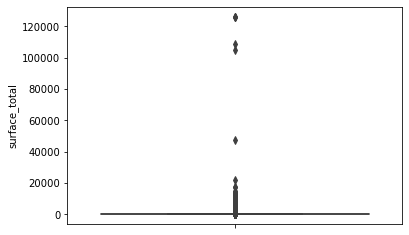

In [21]:
sns.boxplot(data = df_select, y = "surface_total")

Viendo el problema de outliers de esta variable asi como tambien se va a poder observar en las dos siguientes aplicare un IQR. Por cuestion de simplificar el proceso y el codigo, decidi hacer las tres variables juntas con lo siguiente:

In [22]:
df_select1 = df_select
for var in ['surface_total', 'surface_covered', 'price']:
    Q1 = df_select[var].quantile(0.25)
    Q3 = df_select[var].quantile(0.75)
    IQR = Q3 - Q1


    filtered = (df_select1[var] > (Q1 - 1.5 * IQR)) & (df_select1[var] < (Q3 + 1.5 * IQR))
    
    df_select1 = df_select1.loc[filtered]

Ahora respondiendo a la consigna, aplicaremos otro filtro para eliminar las instancias con superficie cubierta mayor a la total y las con valores faltantes

In [23]:
df_select1 = df_select1.loc[df_select1['surface_total'] >= df_select1['surface_covered']]

df_select1 = df_select1.dropna()

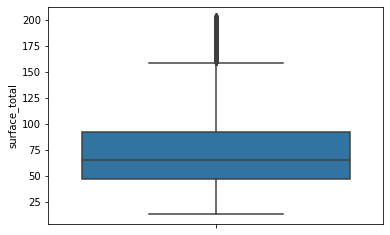

In [24]:
sns.boxplot(data = df_select1, y = "surface_total")

Ahora si, el histograma que seria el grafico correcto:

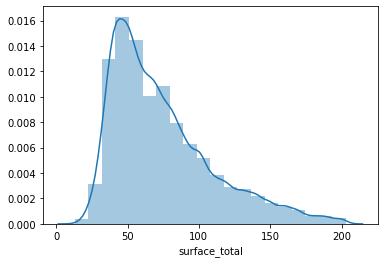

In [25]:
sns.distplot(df_select1['surface_total'], bins = 20)

### VARIABLE SURFACE COVERED

Estadisticos de vaiable surface_covered: 
 count     82250.000000
mean         94.966310
std         778.515243
min           1.000000
25%          44.000000
50%          63.000000
75%          96.000000
max      126062.000000
Name: surface_covered, dtype: float64 



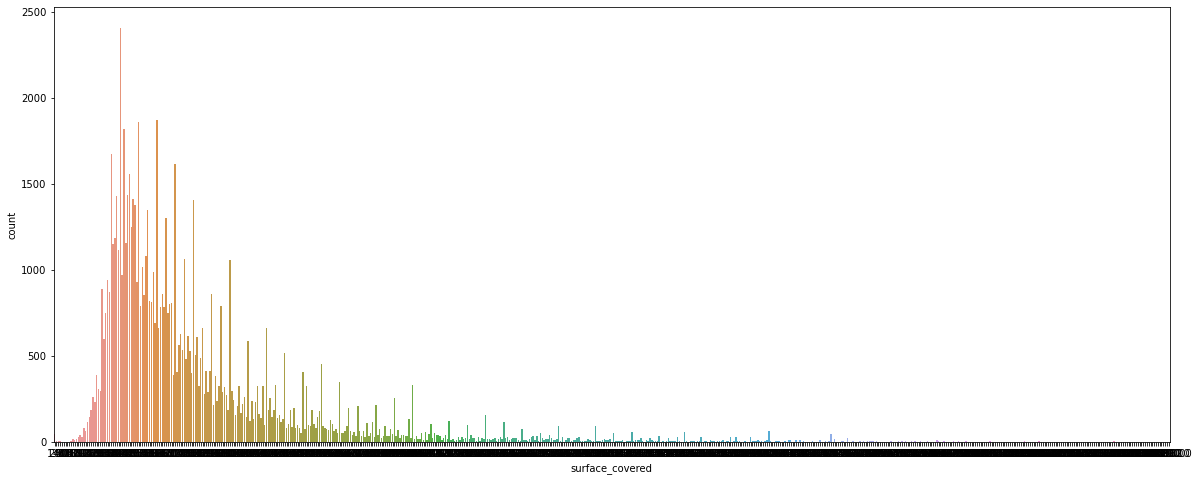

In [26]:
print('Estadisticos de vaiable surface_covered:','\n', df_select['surface_covered'].describe(),'\n')

plt.figure(figsize=(20,8))
sns.countplot(df_select['surface_covered'])

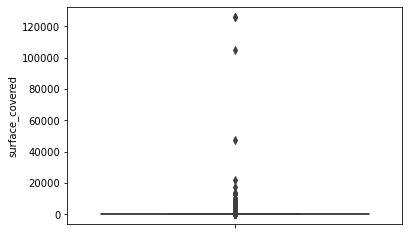

In [27]:
sns.boxplot(data = df_select, y = "surface_covered")

Ahora el grafico con correcciones:

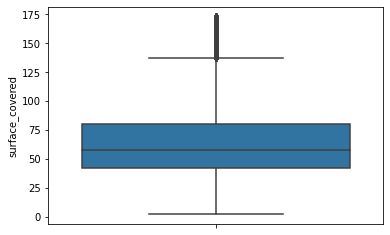

In [28]:
sns.boxplot(data = df_select1, y = "surface_covered")

Ahora si, el histograma que seria el grafico correcto:

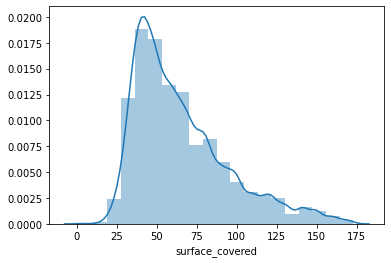

In [29]:
sns.distplot(df_select1['surface_covered'], bins = 20)

### VARIABLE PRICE

Estadisticos de vaiable price: 
 count    9.148500e+04
mean     2.595003e+05
std      3.222654e+05
min      6.000000e+03
25%      1.200000e+05
50%      1.750000e+05
75%      2.790000e+05
max      3.243423e+07
Name: price, dtype: float64 



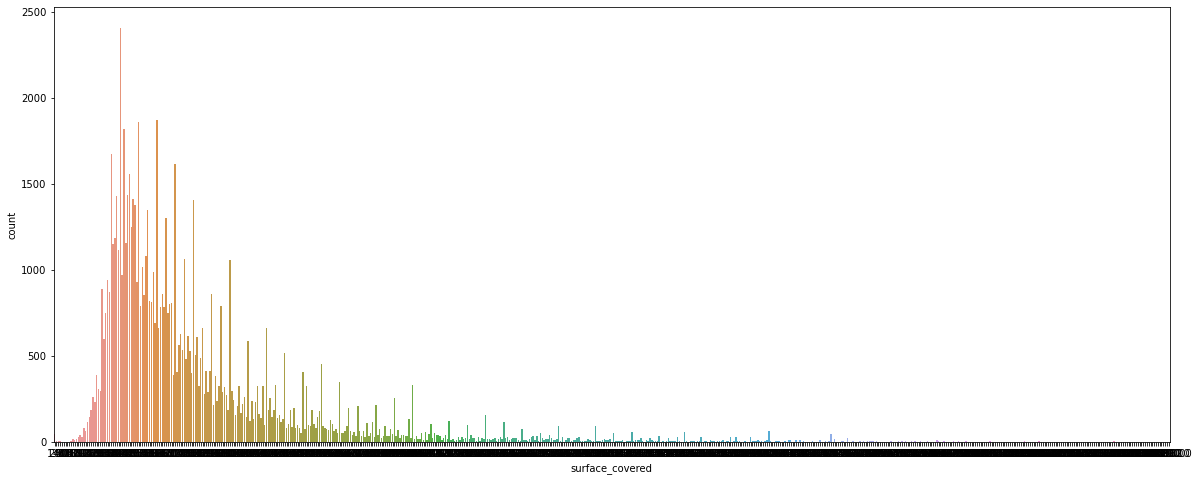

In [30]:
print('Estadisticos de vaiable price:','\n', df_select['price'].describe(),'\n')

plt.figure(figsize=(20,8))
sns.countplot(df_select['surface_covered'])

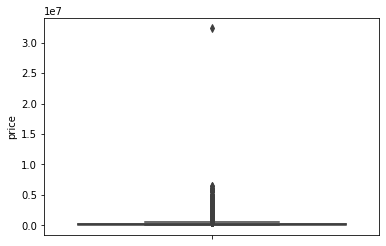

In [31]:
sns.boxplot(data = df_select, y = "price")

Ahora el grafico con las correcciones: 

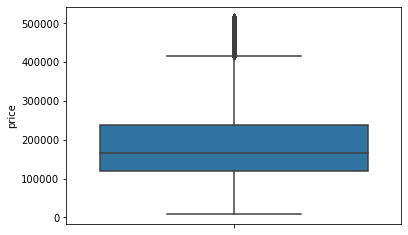

In [32]:
sns.boxplot(data = df_select1, y = "price")

Ahora si, el histograma que seria el grafico correcto:

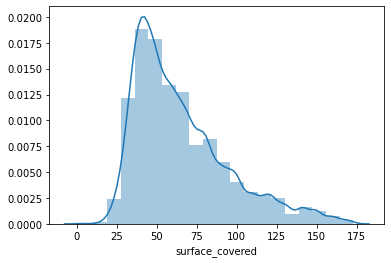

In [33]:
sns.distplot(df_select1['surface_covered'], bins = 20)

Wall time: 0 ns


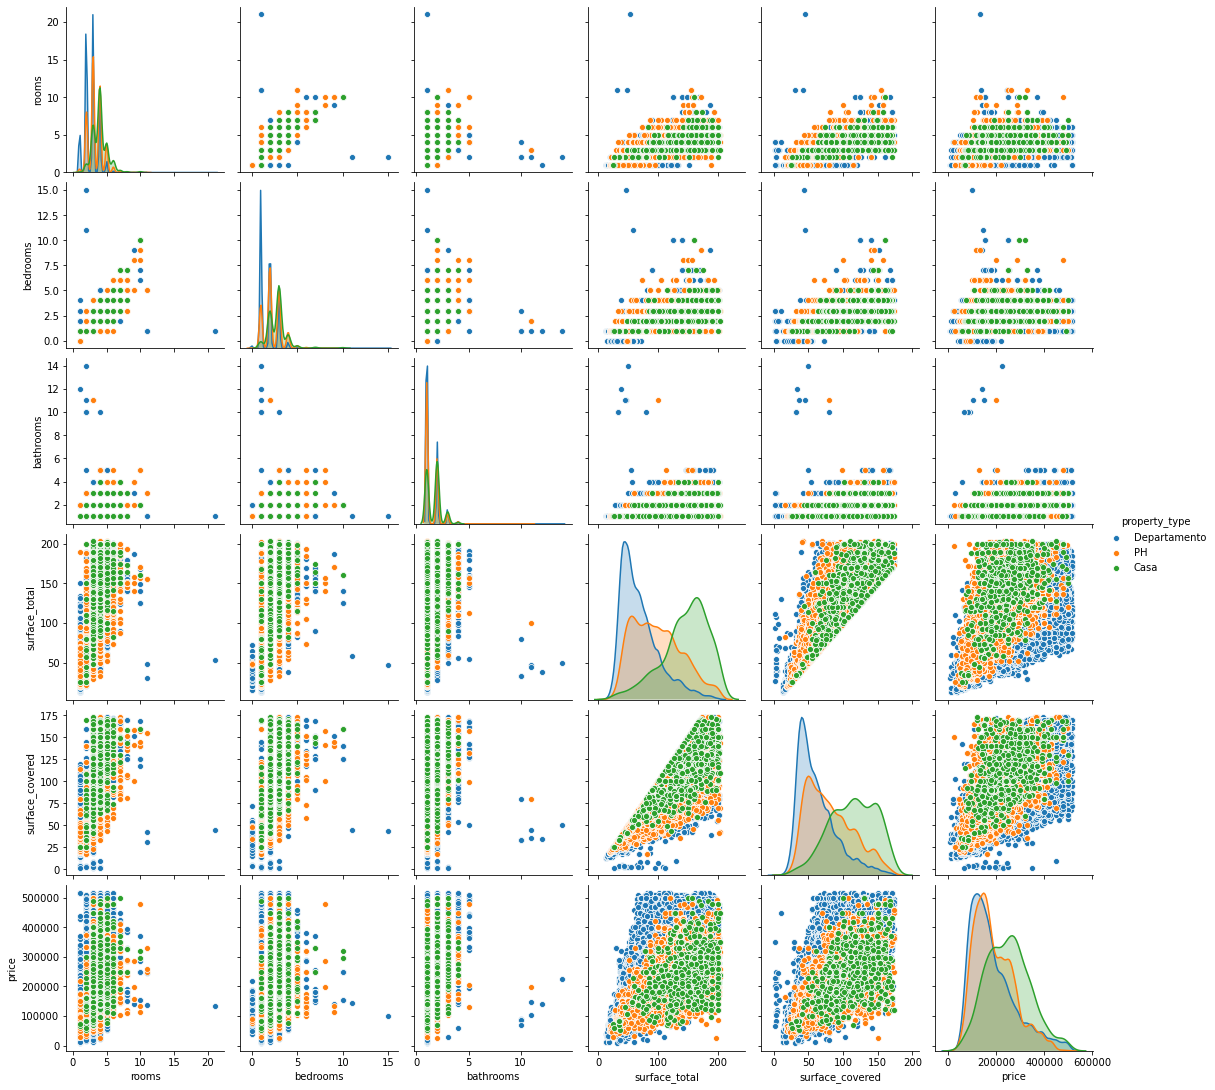

In [102]:
var_interes = df_select1.drop(columns = 'lat')
var_interes = var_interes.drop(columns = 'lon')
sns.pairplot(var_interes, hue = 'property_type')

6. **Correlaciones:** Estudia la correlación entre las variables `rooms`, `bedrooms`, `bathrooms`, `surface_total`, `surface_covered`, `price`. ¿Cuáles son las mejores variables para predecir el precio?¿Qué diferencias encuentras según cada tipo de propiedad?

In [35]:
var_interes.corr()

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
rooms,1.000000,0.931789,0.512890,0.751134,0.800339,0.576731
bedrooms,0.931789,1.000000,0.520700,0.735783,0.790916,0.558333
bathrooms,0.512890,0.520700,1.000000,0.584846,0.623965,0.606812
surface_total,0.751134,0.735783,0.584846,1.000000,0.920374,0.732910
surface_covered,0.800339,0.790916,0.623965,0.920374,1.000000,0.756569
price,0.576731,0.558333,0.606812,0.732910,0.756569,1.000000


Como se puede ver las variables que mas se relacionan con el precio son la superficie total y la cubierta, graficamente se veria asi:

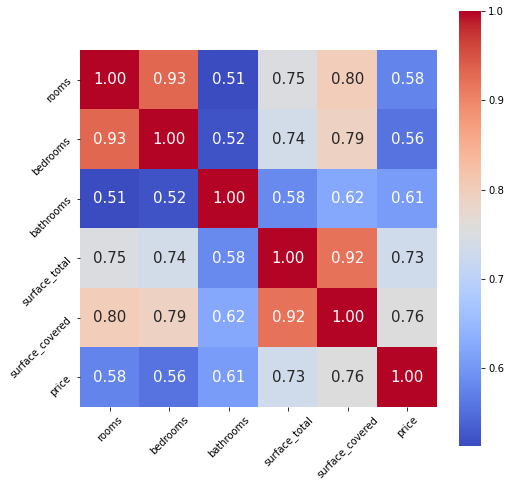

In [36]:
plt.figure(figsize=(8,8))
sns.heatmap(var_interes.corr(), cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 15},
            cmap= 'coolwarm')
plt.xticks(rotation = 45)
plt.yticks(rotation = 45)
plt.show()

### 2.1 Desafío

2.1 Desafío
En el dataset provisto hay mucha información, más allá del problema planteado. Propone una pregunta que pueda ser respondida por el dataset e intenta responderla.¿Cuáles son los sesgos de la respuesta obtenida?(¿Cuán generalizable es la respuesta obtenida?)¿Necesitas información complementaria?¿Cómo la obtendrías?

Por ejemplo: ¿Cuál es el barrio más caro de Buenos Aires? Probablemente puedas responder esta pregunta con este dataset. Pero podria ocurrir que la respuesta esté sesgada. ¿Cómo? Tal vez las propiedades más caras no se publican de forma online, sino que utilizan otro canal de venta.

### Respuesta desafio. 
Una posible pregunta para los clientes a la hora de elegir una propiedad podria ser el promedio de la superficie descubierta de cada propiedad para saber a donde apuntar segun la necesidad de cada uno. Si bien con la informacion brindada esto se podria calcular, la respuesta puede llegar a ser predecible. Podriamos ademas sumarle un filtro por barrio para ser un poco mas precisos en la informacion y que esta tenga mas relevancia a la hora de elegir y comparar.

In [37]:
var_interes['bare_surface'] = var_interes['surface_total'] - var_interes['surface_covered']
var_interes.head()

,start_date,end_date,created_on,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,title,description,property_type,operation_type,bare_surface
0,2019-10-17,2019-12-23,2019-10-17,Argentina,Capital Federal,San Cristobal,7.0,7.0,2.0,140.0,140.0,153000.0,USD,"***Venta semipiso centro, ideal hostel*****",DESCRIPCION DE LA PROPIEDAD: Departamento de 1...,Departamento,Venta,0.0
1,2019-10-17,2019-11-21,2019-10-17,Argentina,Capital Federal,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,USD,Espectacular PH reciclado en Boedo sin expensas.,PH reciclado en Boedo a una cuadra de la plaz...,PH,Venta,12.0
2,2019-10-17,2019-11-01,2019-10-17,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,USD,Depto.tipo casa de 2 ambientes en Venta en Pal...,"2 ambienets amplio , excelente estado , patio ...",PH,Venta,0.0
3,2019-10-17,2019-12-23,2019-10-17,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0,USD,COSTA RICA 5800 / PALERMO HOLLYWOOD / VENTA PH...,HERMOSO PH EN PALERMO!!!2 AMBIENTES TOTALMENTE...,PH,Venta,35.0
5,2019-10-17,2019-11-01,2019-10-17,Argentina,Capital Federal,Villa Crespo,2.0,1.0,1.0,56.0,56.0,150000.0,USD,Depto.tipo casa de 2 ambientes en Venta en Vil...,"Excelente ph solo 2 unidades, no paga expensas...",PH,Venta,0.0


In [38]:
var_interes.groupby(['property_type'])[['bare_surface']].mean()

,bare_surface
property_type,
Casa,31.094633
Departamento,7.483246
PH,17.455396


Como era de esperar, en promedio las casas son las que cuentan con mayor superficie descubierta, lo cual le podria interesar a un cliente que le gusta el aire libre o a una familia por ejemplo. Ahora realizare el mismo analisis pero para ver que barrios son los que mayor superficie descubierta en promedio tienen:

In [39]:
sd_barrio = var_interes.groupby(['l3'])[['bare_surface']].mean()
sd_barrio = sd_barrio.sort_values('bare_surface')
sd_barrio.head()

,bare_surface
l3,
Centro / Microcentro,2.323040
Catalinas,3.000000
Retiro,3.727113
Tribunales,3.865772
San Nicolás,3.918228


In [40]:
sd_barrio.tail()

,bare_surface
l3,
Agronomía,17.661972
Villa Real,17.991150
Mataderos,20.384787
Pompeya,21.280000
Villa Riachuelo,22.750000


El barrio con mayor superficie descubierta es Villa Riachuelo y Pompeya, y en contraparte, los con menor son Microcentro y Catalinas

Siguiendo esta logica, podriamos deducir cuales son los barrios mas comerciales de la zona estudiada con el siguiente filtro pero ahora si, tomando el dataset original:

In [41]:
comercial = pd.read_csv('DS_Proyecto_01_Datos_Properati.csv')
prop_type1 = ['Oficina','Local comercial']
comercial = comercial.loc[comercial['property_type'].isin(prop_type1)]
comercial = comercial[['l3','property_type']]
comercial.head()

,l3,property_type
794,Balvanera,Oficina
795,Balvanera,Oficina
976,La Matanza,Oficina
1283,Ezeiza,Local comercial
2005,Palermo,Oficina


In [42]:
com_barrio = pd.DataFrame(var_interes.groupby(['l3'])[['property_type']].count())
com_barrio = com_barrio.sort_values('property_type')
com_barrio.head()

,property_type
l3,
Catalinas,5
Villa Riachuelo,28
Villa Soldati,43
Velez Sarsfield,105
Villa Real,113


In [43]:
com_barrio.tail()

,property_type
l3,
Belgrano,4330
Caballito,5065
Villa Crespo,5622
Almagro,6382
Palermo,9410


Aqui podemos ver como la zona de Palermo y almagro son las que mas propiedades te tipo oficina o local comercial hay disponibles. Si bien podriamos suponer que esta es la zona con mas actividad comercial/laboral de lo abarcado por el dataset, debemos tener en cuenta que estamos observando datos de venta de inmuebles, lo cual no tiene en cuenta y por lo tanto estaria sezgada al no tener alquileres ni contar con el numero total de tipo de propidedes en cada zona. Por esto solo podriamos concluir en que estas zonas son las de mayor VENTA de este tipo de inmueble en el momento analizado.

### 3. Machine Learning

En esta sección, debes entrenar dos modelos de Machine Learning - uno de vecinos más cercanos y otro de árboles de decisión -  para predecir el precio de las propiedades tipo `Departamento`, `PH` y `Casa`  en la Ciudad Autónoma de Buenos Aires (`Capital Federal`). Para ello, no debes olvidarte de:

* Elegir una métrica apropiada para evaluar los resultados de los modelos.
* Seleccionar las variables predictoras (`X`) y la variable a predecir (`y`). 
* Realizar un Train/Test split de los datos.
* Generar un modelo *benchmark* y evaluarlo.
* Entrenar un modelo de vecinos más cercanos y un modelo de árbol de decisión con hiperparámetros iniciales de su elección.
* Evaluar los modelos obtenidos. Para ello, evalúa la métrica elegida en el conjunto de Test y en el conjunto de Train. También, realiza gráficos de valores reales vs. valores predichos.
* Mejorar el desempeño de sus modelos optimizando el número de vecinos y la profundidad del árbol, respectivamente.
* Entre los modelos entrenados, ¿cuál elegirías para utilizar?¿Por qué? 
* Ser **crítico/a** con la metodología utilizada. Por ejemplo, responde las siguientes preguntas: ¿Qué información no estás usando que podría ayudar al modelo?¿Qué información puede estar demás o repetida?

Estos lineamientos corresponden al **mínimo entregable** de esta sección.


**Importante:** para asegurarnos que trabajes con un dataset apropiados, debes volver a cargar los datos y realizar el siguiente filtrado:

1. Selecciona aquellas propiedades en Capital Federal y cuyo tipo de propiedad es Departamento, PH o Casa.
1. Selecciona aquellas propiedades cuya superficie total es menor a 1000 m2 y mayor a 15 m2.
1. Selecciona aquellas propiedades cuya precio es menor 4000000 dólares.
1. Selecciona las columnas `rooms`, `bedrooms`, `bathrooms`, `surface_total`, `surface_covered` y `price`.
1. Descarta aquellas instacias con valores faltantes.

**Checkpoint:** deberías obtener un dataset con 81019 instacias y 6 columnas.

In [44]:
df = pd.read_csv('DS_Proyecto_01_Datos_Properati.csv')
df = df.loc[df['l2'] == 'Capital Federal']
prop_type = ['Departamento','Casa', 'PH']
df = df.loc[df['property_type'].isin(prop_type)]
df = df.loc[(df['surface_total']>=15) & (df['surface_total']<=1000)]
df = df.loc[df['price']<=4000000]
df = df[['rooms', 'bedrooms', 'bathrooms', 'surface_total', 'surface_covered', 'price']]
df.dropna(inplace=True)
df.shape

(81019, 6)

In [45]:
df.corr()

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
rooms,1.000000,0.925604,0.601887,0.725799,0.304407,0.479972
bedrooms,0.925604,1.000000,0.605002,0.695523,0.291140,0.442418
bathrooms,0.601887,0.605002,1.000000,0.651924,0.275936,0.638737
surface_total,0.725799,0.695523,0.651924,1.000000,0.375749,0.686459
surface_covered,0.304407,0.291140,0.275936,0.375749,1.000000,0.298212
price,0.479972,0.442418,0.638737,0.686459,0.298212,1.000000


Aca podemos ver como cambio la correlacion aplicando el nuevo filtro al dataset, siendo las variables mas relevantes al precio, la superficie total y la cantidad de baños.

## Primera opcion tomando todas las variables

In [46]:
X = df.drop("price", axis=1)
y = df.price

In [47]:
X.head()

,rooms,bedrooms,bathrooms,surface_total,surface_covered
0,7.0,7.0,2.0,140.0,140.0
1,2.0,1.0,2.0,70.0,58.0
2,2.0,1.0,1.0,45.0,45.0
3,2.0,1.0,1.0,85.0,50.0
5,2.0,1.0,1.0,56.0,56.0


In [48]:
y.head()

0    153000.0
1    159000.0
2    125000.0
3    295000.0
5    150000.0
Name: price, dtype: float64

In [49]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Benchmark

In [50]:
def predict_instance(X):
    '''
    Este moddelo servra para predecir la tasacion de las 
    propiedades tomando como parametro el promedio de los
    precios del dataset'''
    
    prediction = int(df.price.mean())
    return prediction

In [51]:
def predict(X):
    y_predicted = []
    for x in X.itertuples(): 
        y_i = predict_instance(x) 
        y_predicted.append(y_i)
    return y_predicted

In [52]:
y_train_pred_bench = predict(X_train)

In [53]:
y_test_pred_bench = predict(X_test)

In [54]:
from sklearn.metrics import mean_squared_error

rmse_train_bench = np.sqrt(mean_squared_error(y_train, y_train_pred_bench))
rmse_test_bench = np.sqrt(mean_squared_error(y_test, y_test_pred_bench))

print('El rmse del train es: ', rmse_train_bench)
print('El rmse del test es: ', rmse_test_bench)

El rmse del train es:  297502.7000311039
El rmse del test es:  302293.47495336604


### KNN Vecinos mas cercanos (all)

In [55]:
from sklearn.neighbors import KNeighborsRegressor

knn_regressor = KNeighborsRegressor(n_neighbors=3)

In [56]:
knn_regressor.fit(X_train,y_train)

KNeighborsRegressor(n_neighbors=3)

In [57]:
y_train_pred = knn_regressor.predict(X_train)
y_test_pred = knn_regressor.predict(X_test)

In [58]:
rmse_train_knn_all = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test_knn_all = np.sqrt(mean_squared_error(y_test, y_test_pred))

print('El rmse del train es: ', rmse_train_knn_all)
print('El rmse del test es: ', rmse_test_knn_all)

El rmse del train es:  103804.20852724434
El rmse del test es:  152317.82229037234


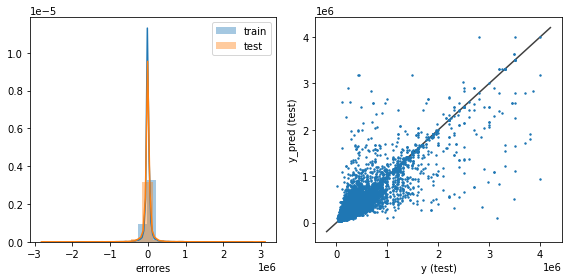

In [59]:
plt.figure(figsize = (8,4))

plt.subplot(1,2,1)
sns.distplot(y_train - y_train_pred, bins = 20, label = 'train')
sns.distplot(y_test - y_test_pred, bins = 20, label = 'test')
plt.xlabel('errores')
plt.legend()

ax = plt.subplot(1,2,2)
ax.scatter(y_test,y_test_pred, s =2)    
lims = [
np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes]
]
    
ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
plt.xlabel('y (test)')
plt.ylabel('y_pred (test)')
    
plt.tight_layout()
plt.show()

#### Optimizacion knn all

In [60]:
# Definimos las listas vacias para los valores de accuracy deseados
knn_lista_train_all = []
knn_lista_test_all = []

# Definimos la lista de valores de k que vamos a explorar
k_vecinos = [1,2,3,4,5,6,7,8,9,10,15,20,25,30,35,40,50]

# Generamos en loop sobre los distintos valores de k 
for k in k_vecinos:
    
    # Vamos a repetir el siguiente bloque de código
    
    # Definir el modelo con el valor de vecinos deseado
    knn_reg_all = KNeighborsRegressor(n_neighbors=k)
    
    # Entrenar el modelo
    knn_reg_all.fit(X_train,y_train)
    
    # Predecir y evaluar sobre el set de entrenamiento
    y_train_predi = knn_reg_all.predict(X_train)
    train_rmse_all = np.sqrt(mean_squared_error(y_train, y_train_predi))
    
    # Predecir y evaluar sobre el set de evaluación
    y_test_predi = knn_reg_all.predict(X_test)
    test_rmse_all = np.sqrt(mean_squared_error(y_test, y_test_predi))
    
    # Agregar la información a las listas
    knn_lista_train_all.append(train_rmse_all)
    knn_lista_test_all.append(test_rmse_all)

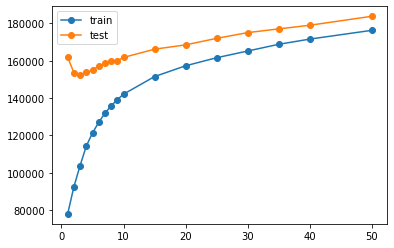

In [61]:
plt.plot(k_vecinos,knn_lista_train_all,'o-',label='train' )
plt.plot(k_vecinos,knn_lista_test_all,'o-',label='test')
plt.legend()

### Arbol de decision

In [62]:
from sklearn.tree import DecisionTreeRegressor
tree_regressor = DecisionTreeRegressor(max_depth=13)

In [63]:
tree_regressor.fit(X, y)

DecisionTreeRegressor(max_depth=13)

In [64]:
y_train_predict = tree_regressor.predict(X_train)
y_test_predict = tree_regressor.predict(X_test)

In [65]:
from sklearn.metrics import mean_squared_error

rmse_train_tree_all = np.sqrt(mean_squared_error(y_train, y_train_predict))
rmse_test_tree_all = np.sqrt(mean_squared_error(y_test, y_test_predict))

print('El rmse del train es: ', rmse_train_tree_all)
print('El rmse del test es: ', rmse_test_tree_all)

El rmse del train es:  95844.93782500779
El rmse del test es:  98510.8493475642


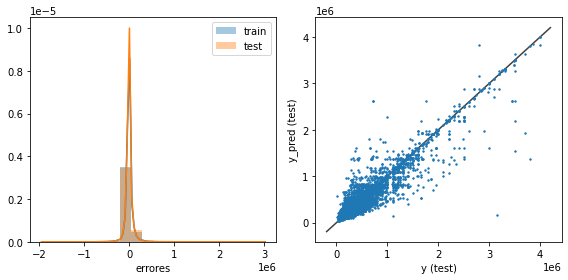

In [66]:
plt.figure(figsize = (8,4))

plt.subplot(1,2,1)
sns.distplot(y_train - y_train_predict, bins = 20, label = 'train')
sns.distplot(y_test - y_test_predict, bins = 20, label = 'test')
plt.xlabel('errores')
plt.legend()

ax = plt.subplot(1,2,2)
ax.scatter(y_test,y_test_predict, s =2)    
lims = [
np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes]
]
    
ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
plt.xlabel('y (test)')
plt.ylabel('y_pred (test)')
    
plt.tight_layout()
plt.show()

#### Optimizacion arbol (all)

In [67]:
# Definimos las listas vacias para los valores de accuracy deseados
tree_lista_train_all = []
tree_lista_test_all = []

# Definimos la lista de valores de max_depth que vamos a explorar
max_depths = np.arange(1,20)

# Generamos en loop sobre los distintos valores de profundidad 
for max_depth in max_depths:
    
    # Vamos a repetir el siguiente bloque de código
    
    # Definir el modelo con el valor de profundidad
    rmse_all = DecisionTreeRegressor(max_depth = max_depth, random_state=42)
    
    # Entrenar el modelo
    rmse_all.fit(X_train,y_train)
    
    # Predecir y evaluar sobre el set de entrenamiento
    y_train_pred_op = rmse_all.predict(X_train)
    train_rmse_all= np.sqrt(mean_squared_error(y_train, y_train_pred_op))
    
    # Predecir y evaluar sobre el set de evaluación
    y_test_pred_op = rmse_all.predict(X_test)
    test_rmse_all = np.sqrt(mean_squared_error(y_test, y_test_pred_op))
    
    # Agregar la información a las listas
    tree_lista_train_all.append(train_rmse_all)
    tree_lista_test_all.append(test_rmse_all)

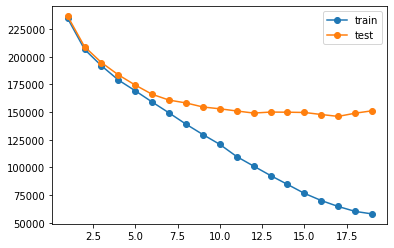

In [68]:
plt.plot(max_depths,tree_lista_train_all,'o-',label='train' )
plt.plot(max_depths,tree_lista_test_all,'o-',label='test')
plt.legend()

## Segnda opcion tomando las dos variables mas relevantes

In [69]:
X1 = df.iloc[:,[1,3]]
y1 = df.price

In [70]:
X1.head()

,bedrooms,surface_total
0,7.0,140.0
1,1.0,70.0
2,1.0,45.0
3,1.0,85.0
5,1.0,56.0


In [71]:
y1.head()

0    153000.0
1    159000.0
2    125000.0
3    295000.0
5    150000.0
Name: price, dtype: float64

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.3, random_state=42)

### KNN Vecinos mas cercanos

In [73]:
knn_regressor = KNeighborsRegressor(n_neighbors=8)

knn_regressor.fit(X_train,y_train)

y_train_pred = knn_regressor.predict(X_train)
y_test_pred = knn_regressor.predict(X_test)

In [74]:
rmse_train_knn2 = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test_knn2 = np.sqrt(mean_squared_error(y_test, y_test_pred))

print('El rmse del train es: ', rmse_train_knn2)
print('El rmse del test es: ', rmse_test_knn2)

El rmse del train es:  177783.66275530975
El rmse del test es:  200210.44670605863


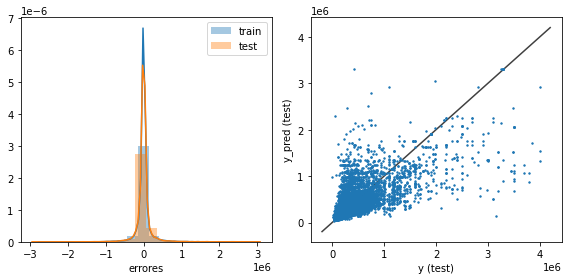

In [75]:
plt.figure(figsize = (8,4))

plt.subplot(1,2,1)
sns.distplot(y_train - y_train_pred, bins = 20, label = 'train')
sns.distplot(y_test - y_test_pred, bins = 20, label = 'test')
plt.xlabel('errores')
plt.legend()

ax = plt.subplot(1,2,2)
ax.scatter(y_test,y_test_pred, s =2)    
lims = [
np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes]
]
    
ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
plt.xlabel('y (test)')
plt.ylabel('y_pred (test)')
    
plt.tight_layout()
plt.show()

#### Optimizacion knn (2)

In [76]:
knn_lista_train2 = []
knn_lista_test2 = []

k_vecinos = [1,2,3,4,5,6,7,8,9,10,15,20,25,30,35,40,50]

for k in k_vecinos:
            
    knn_reg2 = KNeighborsRegressor(n_neighbors=k)
   
    knn_reg2.fit(X_train,y_train)
    
    y_train_predic = knn_reg2.predict(X_train)
    train_rmse2 = np.sqrt(mean_squared_error(y_train, y_train_predic))
    
    y_test_predic = knn_reg2.predict(X_test)
    test_rmse2 = np.sqrt(mean_squared_error(y_test, y_test_predic))
    
    knn_lista_train2.append(train_rmse2)
    knn_lista_test2.append(test_rmse2)

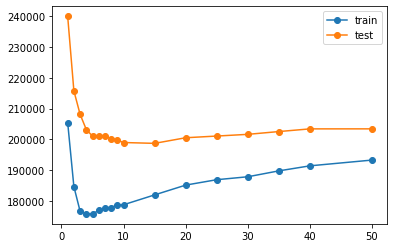

In [77]:
plt.plot(k_vecinos,knn_lista_train2,'o-',label='train' )
plt.plot(k_vecinos,knn_lista_test2,'o-',label='test')
plt.legend()

### Arbol de decision 

#### Optimizacion arbol (2)

In [78]:
tree_lista_train2 = []
tree_lista_test2 = []

max_depths = np.arange(1,20)
 
for max_depth in max_depths:
    
    rmse2 = DecisionTreeRegressor(max_depth = max_depth, random_state=42)
    
    rmse2.fit(X_train,y_train)
    
    y_train_pred_opt = rmse2.predict(X_train)
    train_rmse2= np.sqrt(mean_squared_error(y_train, y_train_pred_opt))
    
    y_test_pred_opt = rmse2.predict(X_test)
    test_rmse2 = np.sqrt(mean_squared_error(y_test, y_test_pred_opt))
    
    tree_lista_train2.append(train_rmse2)
    tree_lista_test2.append(test_rmse2)

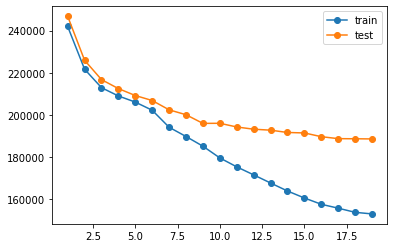

In [79]:
plt.plot(max_depths,tree_lista_train2,'o-',label='train' )
plt.plot(max_depths,tree_lista_test2,'o-',label='test')
plt.legend()

In [80]:
tree_regressor = DecisionTreeRegressor(max_depth=10)

tree_regressor.fit(X1, y1)

DecisionTreeRegressor(max_depth=10)

In [81]:
y_train_predict = tree_regressor.predict(X_train)
y_test_predict = tree_regressor.predict(X_test)

In [82]:
rmse_train_tree2 = np.sqrt(mean_squared_error(y_train, y_train_predict))
rmse_test_tree2 = np.sqrt(mean_squared_error(y_test, y_test_predict))

print('El rmse del train es: ', rmse_train_tree2)
print('El rmse del test es: ', rmse_test_tree2)

El rmse del train es:  176819.2133290201
El rmse del test es:  181542.6722621245


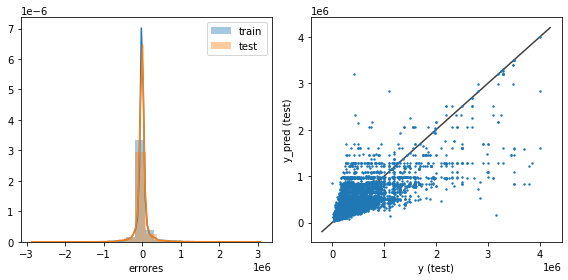

In [83]:
plt.figure(figsize = (8,4))

plt.subplot(1,2,1)
sns.distplot(y_train - y_train_predict, bins = 20, label = 'train')
sns.distplot(y_test - y_test_predict, bins = 20, label = 'test')
plt.xlabel('errores')
plt.legend()

ax = plt.subplot(1,2,2)
ax.scatter(y_test,y_test_predict, s =2)    
lims = [
np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes]
]
    
ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
plt.xlabel('y (test)')
plt.ylabel('y_pred (test)')
    
plt.tight_layout()
plt.show()

## Tercera opcion solo con la variable mas relevante (surface_total)

In [84]:
X2 = df.iloc[:,[3]]
y2 = df.price

In [85]:
X2.head()

,surface_total
0,140.0
1,70.0
2,45.0
3,85.0
5,56.0


In [86]:
y2.head()

0    153000.0
1    159000.0
2    125000.0
3    295000.0
5    150000.0
Name: price, dtype: float64

In [87]:
X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size=0.3, random_state=42)

### KNN Vecinos mas cercanos

#### Optimizacion knn (1)

In [88]:
knn_lista_train1 = []
knn_lista_test1 = []

k_vecinos = [1,2,3,4,5,6,7,8,9,10,15,20,25,30,35,40,50]

for k in k_vecinos:
    
    knn_reg1 = KNeighborsRegressor(n_neighbors=k)
    
    knn_reg1.fit(X_train,y_train)
    
    y_train_predicti = knn_reg1.predict(X_train)
    train_rmse1 = np.sqrt(mean_squared_error(y_train, y_train_predicti))
    
    y_test_predicti = knn_reg1.predict(X_test)
    test_rmse1 = np.sqrt(mean_squared_error(y_test, y_test_predicti))
    
    knn_lista_train1.append(train_rmse1)
    knn_lista_test1.append(test_rmse1)

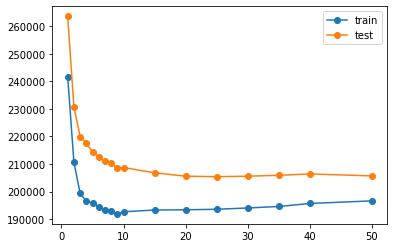

In [89]:
plt.plot(k_vecinos,knn_lista_train1,'o-',label='train' )
plt.plot(k_vecinos,knn_lista_test1,'o-',label='test')
plt.legend()

In [90]:
knn_regressor = KNeighborsRegressor(n_neighbors=9)

knn_regressor.fit(X_train,y_train)

y_train_pred = knn_regressor.predict(X_train)
y_test_pred = knn_regressor.predict(X_test)

In [91]:
rmse_train_knn1 = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test_knn1 = np.sqrt(mean_squared_error(y_test, y_test_pred))

print('El rmse del train es: ', rmse_train_knn1)
print('El rmse del test es: ', rmse_test_knn1)

El rmse del train es:  191912.72644736985
El rmse del test es:  208396.98700651704


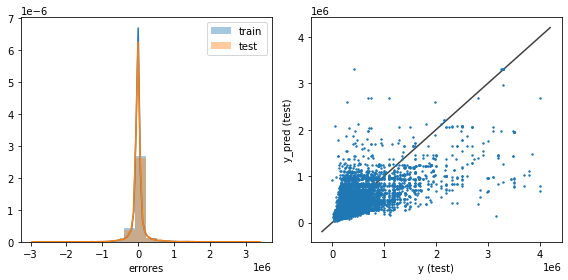

In [92]:
plt.figure(figsize = (8,4))

plt.subplot(1,2,1)
sns.distplot(y_train - y_train_pred, bins = 20, label = 'train')
sns.distplot(y_test - y_test_pred, bins = 20, label = 'test')
plt.xlabel('errores')
plt.legend()

ax = plt.subplot(1,2,2)
ax.scatter(y_test,y_test_pred, s =2)    
lims = [
np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes]
]
    
ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
plt.xlabel('y (test)')
plt.ylabel('y_pred (test)')
    
plt.tight_layout()
plt.show()

### Arbol de decision

#### Optimizacion arbol (1)

In [93]:
tree_lista_train1 = []
tree_lista_test1 = []

max_depths = np.arange(1,20)

for max_depth in max_depths:
    
    rmse1 = DecisionTreeRegressor(max_depth = max_depth, random_state=42)
    
    rmse1.fit(X_train,y_train)
    
    y_train_pred_opti = rmse1.predict(X_train)
    train_rmse1= np.sqrt(mean_squared_error(y_train, y_train_pred_opti))
    
    y_test_pred_opti = rmse1.predict(X_test)
    test_rmse1 = np.sqrt(mean_squared_error(y_test, y_test_pred_opti))
    
    tree_lista_train1.append(train_rmse1)
    tree_lista_test1.append(test_rmse1)

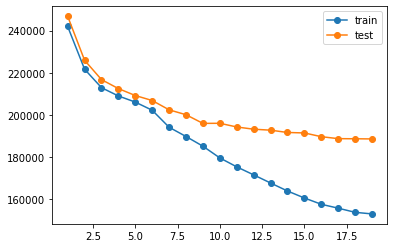

In [94]:
plt.plot(max_depths,tree_lista_train2,'o-',label='train' )
plt.plot(max_depths,tree_lista_test2,'o-',label='test')
plt.legend()

In [95]:
tree_regressor = DecisionTreeRegressor(max_depth=8)

tree_regressor.fit(X2, y2)

DecisionTreeRegressor(max_depth=8)

In [96]:
y_train_predict = tree_regressor.predict(X_train)
y_test_predict = tree_regressor.predict(X_test)

In [97]:
rmse_train_tree1 = np.sqrt(mean_squared_error(y_train, y_train_predict))
rmse_test_tree1 = np.sqrt(mean_squared_error(y_test, y_test_predict))

print('El rmse del train es: ', rmse_train_tree1)
print('El rmse del test es: ', rmse_test_tree1)

El rmse del train es:  190114.0115642465
El rmse del test es:  195209.41319207105


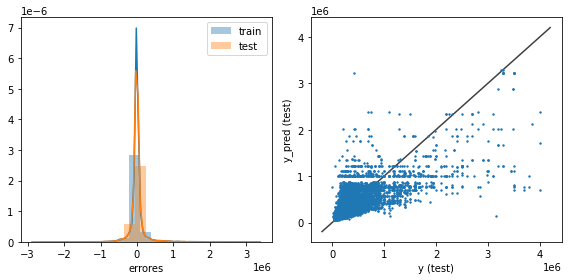

In [98]:
plt.figure(figsize = (8,4))

plt.subplot(1,2,1)
sns.distplot(y_train - y_train_predict, bins = 20, label = 'train')
sns.distplot(y_test - y_test_predict, bins = 20, label = 'test')
plt.xlabel('errores')
plt.legend()

ax = plt.subplot(1,2,2)
ax.scatter(y_test,y_test_predict, s =2)    
lims = [
np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes]
]
    
ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
plt.xlabel('y (test)')
plt.ylabel('y_pred (test)')
    
plt.tight_layout()
plt.show()

### Eleccion

In [99]:
resultados_dic = {'Modelo': ['bench','bench', 'knn_all', 'tree_all', 'knn_all', 'tree_all', 'knn_2', 'tree_2','knn_2', 'tree_2', 'knn1', 'tree1', 'knn1', 'tree1'], 
                  'Error':[rmse_train_bench, rmse_test_bench, rmse_train_knn_all, rmse_train_tree_all, rmse_test_knn_all, rmse_test_tree_all, rmse_train_knn2, rmse_train_tree2, rmse_test_knn2, rmse_test_tree2, rmse_train_knn1, rmse_train_tree1, rmse_test_knn1, rmse_test_tree1],
                  'Datos': ['train', 'test', 'train', 'train', 'test', 'test', 'train', 'train', 'test', 'test', 'train', 'train', 'test', 'test']
                 } 

Resultados = pd.DataFrame(resultados_dic)
Resultados

,Modelo,Error,Datos
0,bench,297502.700031,train
1,bench,302293.474953,test
2,knn_all,103804.208527,train
3,tree_all,95844.937825,train
4,knn_all,152317.822290,test
5,tree_all,98510.849348,test
6,knn_2,177783.662755,train
7,tree_2,176819.213329,train
8,knn_2,200210.446706,test
9,tree_2,181542.672262,test


(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text major ticklabel objects>)

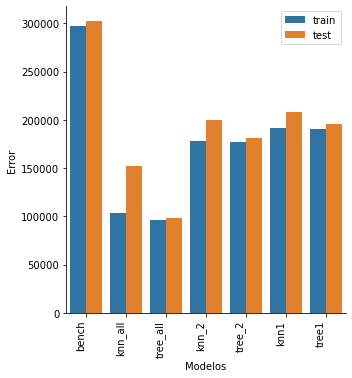

In [100]:
sns.catplot(x = 'Modelo', y = 'Error', hue = 'Datos', kind = 'bar', data = Resultados, legend = False)
plt.xlabel('Modelos')
plt.ylabel('Error')
plt.legend(loc='upper right')
plt.xticks(rotation=90, horizontalalignment='right')

## Conclusión

Utilice la metrica del RMSE ya que estabamos haciendo un analisis de regresion y me parecio la mas apropiada para tener en cuenta el error en las mismas magnitudes que la variable. Ademas con la cantidad de datos atipicos me parecio la que mas se acomodaba a la necesidad del modelo y daba un error mas coherente y en las medidas de la variable analizada.
Como se puede observar en el grafico anterior, estan comparados todos los modelos optimizados y con distintas variables. Todos los modelos superaron el Benchmark lo cual es muy positivo(en mas de un 50% con respecto a su error), pero a la hora de elegir uno, tendría en cuenta que en los modelos de árbol de decisión la variabilidad entre el modelo test y train fue mucho menor que en la de los vecinos mas cercanos por lo que personalmente me inclinaría por este tipo de modelos. 
Teniendo en cuenta lo antes mencionado, y la métrica utilizada, veremos que el modelo que utiliza todas las variables, si bien es el que mayor precisión tiene con respecto al error, siendo casi la mitad de los otros dos modelos, podria ser muy pesado para correr o costoso para recolectar todos los datos. Entre los dos modelos restantes, el error no varia significativamente al retirar una variable por lo que no me parece de gran importancia sumar una al modelo. 
Si analizamos las variables atentamente podemos observar que hay un dato repetido en una de ellas ya que la variable mas importante para el modelo (surface_total) contempla en su interior la variable surface_covered que si bien tiene una relevancia menor los datos estarían repitiéndose. Este supuesto que inicialmente me plantee, se descarto al ver quie no hay multicolinealidad entre estas dos variables y que al fin y al cabo ambas por separado si aportan informacion al modelo. Sin embargo, creo mas conveniente haber separado (como esta en la primera parte del desafió que me plantee) esa superficie total en cubierta y descubierta, y analizar los modelos de esta forma (No lo realice para no desviar el foco de lo propuesto por las consignas). También si tomamos en cuenta que la mayor proporción de inmuebles son departamentos y ya vimos que la superficie descubierta en promedio es de 7mts2, la cual es escasa en comparación con la total, podríamos suponer entonces que la duplicación de este dato influye aun mas en el modelo que si el espacio al aire libre de las propiedades fuese mayor, tambien descartado, aunque no del todo, por la misma razon antes expuesta. Seria un dato que desde mi punto de vista resulta conveniente analizar. En vista de todo lo antes propuesto, me quedaría, en primer lugar, con el modelo que utiliza todas las variables, ya que el error fue significativamente menor y todas las variables tuvieron influencia. Siempre teniendo en cuenta que los costos de obtener estos datos y la complejidad del modelo no son restricciones para el cliente.